# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS18

# 01 - Introduction to Python for Mathematics

In [15]:
###### Run this cell (Ctrl + enter) when you first open 
###### the notebook to import all packages
import numpy as np
import numpy.linalg as linalg
import scipy as scp
import sympy as sp
import matplotlib.pyplot as plt
import imageio
from skimage import transform
%matplotlib inline

ImportError: No module named imageio

To find the documentation for a function, use a ? after the function as below and run the cell

In [ ]:
np.array?

## Creating a rotation matrix

Let's suppose that we have a robot that is located at the origin of the world frame, such that its local coordinate system is aligned with the world frame. The robot now rotates counterclockwise by $\frac{\pi}{4}$ radians around the $z$-axis. Our task is to define a rotation matrix that expresses the robot's rotation; in other words, denoting the world frame by $A$ and the robot frame by $B$, we need to express the matrix ${}^A_BR$.

In [4]:
def get_rotation_matrix_z_axis(theta):
    A_B_R=np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
    return A_B_R
    #raise NotImplementedError()

def get_rotation_matrix_x_axis(theta):
    A_B_R=np.array([[0,0,1],[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0]])
    return A_B_R
    #raise NotImplementedError()

def get_rotation_matrix_y_axis(theta):
    A_B_R=np.array([[np.cos(theta),-np.sin(theta),0],[0,0,1],[np.sin(theta),np.cos(theta),0]])
    return A_B_R
    #raise NotImplementedError()
    
theta = np.pi / 4.
print(get_rotation_matrix_z_axis(theta))

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


## Plotting the frames

Let's now plot the world frame and the rotated frame of the robot together.

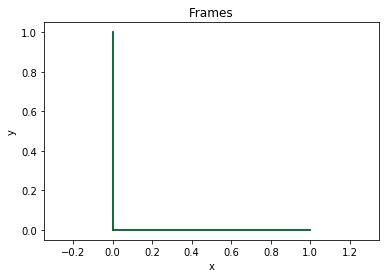

In [22]:
# plot the world frame
plt.plot([0,1],[0,0],'b')
plt.plot([0,0],[0,1],'b')


# plot the robot frame
plt.plot([0,1],[0,0],'g')
plt.plot([0,0],[0,1],'g')
# set some plot properties
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frames')
plt.show()

## Translating frames

Let's now assume that, instead of rotating, the robot translates by $3$ units along the $x$-axis and $5$ units along the $y$-axis. We could express this in Python as follows:

In [7]:
# define the current position
p_b=np.array([0,0,0])
# define the translation
t=np.array([3,5,0])
# define the new position

P_b_new=p_b+t

print P_b_new


[3 5 0]


## Plotting the frames

Let's now plot the world frame and the translated frame of the robot.

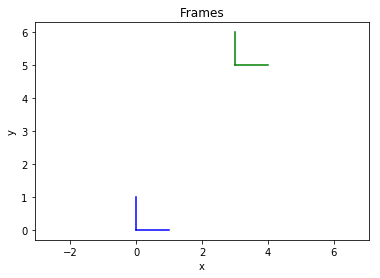

In [10]:
# plot the world frame
plt.plot([0,1],[0,0],'b')
plt.plot([0,0],[0,1],'b')
# plot the robot frame
plt.plot([P_b_new[0],P_b_new[0]+1],[P_b_new[1],P_b_new[1]],'g')
plt.plot([P_b_new[0],P_b_new[0]],[P_b_new[1],P_b_new[1]+1],'g')
# set some plot properties
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Frames')
plt.show()

## Combining rotation and translation into a homogeneous transformation matrix

Let's now assume that the robot both rotates by $\frac{\pi}{4}$ around the $z$-axis and translates by $3$ units along the $x$-axis and $5$ units along the $y$-axis. As we know from the lecture, rotations and translations can be expressed together in a so-called homogeneous transformation matrix. Let's perform this transformation in Python.

In [13]:
# # # specify the original position, p_b, of the robot (in homogeneous coordinates)
p_b=np.array([0,0,0,1])
# define the translation
t=np.array([3,5,0])
# convert p_b into a column vector
p_b=p_b[np.newaxis].T
# create the transformation matrix
t=t[np.newaxis]
A_B_R=get_rotation_matrix_z_axis(np.pi/4)

T=np.hstack((A_B_R,t))
T=np.vstack((T,np.array([0,0,0,1])))
# transform p_b
pb_new=T.dot(p_b)
# select and print the translation column
print(T[0:3,-1])
# select and print the last row of the matrix
print(T[-1,1])
# select and print the translation matrix
print(T[0:3,0:3])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## Plotting the frames

Let's plot the world frame and the transformed robot frame.

In [ ]:
# plot the world frame

# plot the robot frame

# set some plot properties

## Symbolic mathematics using symbolic Python

In [20]:
# create a symbolic variable, x
x=sp.symbols('x')
# create a function of x
y=x**2
# substitute values into y
n1=y.evalf(subs={x: 2.})
print(n1)
# differentiate y with respect to x
y_prime=y.diff(x)
print(y_prime)
# integrate y with respect to x
y_intergration=y.integrate(x)
print(y_intergration)
# substitute values into y_prime
print(y_prime.evalf(subs={x: 2.}))

4.00000000000000
2*x
x**3/3
4.00000000000000


## Loading files and plotting 3D data

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# load data

# create a 3D scatter plot

## Loading and manipulating images

In [ ]:
# load an image using scipy

# display the image

# resize the image and display the resized version

# find edges in the image

## Optimising functions using scipy

In [ ]:
# define a function to return the square of a number
def f(x):
    raise NotImplementedError()

# define a function to return the differential of x**2
def f_prime(x):
    raise NotImplementedError()

# optimising x**2 starting at x = 0.5 (the minimum occurs 
# at x = 0, so that's the expected solution)